In [1]:
import pandas as pd 

neo= "neo.csv"

neo = pd.read_csv(neo)


In [2]:
print (neo.head())


        id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20   

In [3]:
neo.index

RangeIndex(start=0, stop=90836, step=1)

In [4]:
neo.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [5]:
neo.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

In [6]:
neo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.0+ MB


# Machine Learning 



In [7]:
#split into target and features 
target = neo.hazardous
features =neo.drop(["hazardous","name","orbiting_body"], axis=1)

target = pd.get_dummies(target)

In [8]:
from sklearn.model_selection import train_test_split
F1,f2,T1,t2 = train_test_split(features,target)


In [9]:
#F1,T1 = training set 
#f2, t2 = test set 

from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
predictor = model.fit(F1,T1[True])
t_ans= predictor.predict(f2)


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(t_ans, t2[True])

0.8904399136906073

Text(83.40000000000006, 0.5, 'true value')

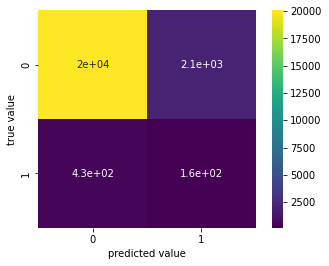

In [11]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
mat = confusion_matrix(t_ans,t2[True])
sns.heatmap(mat, square=True, annot=True,cmap="viridis", cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value')